In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

imori = cv2.imread("imori.jpg")

# カラー画像の表示
def show_image(image):
    img_rgb = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

# グレースケール画像の表示 
def show_gray_image(gray_image):
    plt.imshow(gray_image)
    plt.gray()
    plt.show()

In [4]:
# グレースケール化
def gray(gray_image):
    b = gray_image[:,:,0].copy()
    g = gray_image[:,:,1].copy()
    r = gray_image[:,:,2].copy()
    
    y = 0.2126*r + 0.7152*g + 0.0722*b
    y = y.astype(int)
    
    return y    

def Otsu(img):
    max_t = 0
    max_sigma = 0
    h,w = img.shape
    
    for i in range(1,256):
        v0 = img[np.where(img<i)]
        v1 = img[np.where(img>=i)]
        w0 = len(v0)/(h*w)
        w1 = len(v1)/(h*w)
#         0に対する平均の計算すると警告が出る.以下の記述方法は三項演算子ってやつ
        m0 = np.mean(v0) if len(v0)>0 else 0
        m1 = np.mean(v1) if len(v1)>0 else 0
        sb = w0*w1*((m0-m1)**2)
        
        if sb > max_sigma:
            max_sigma = sb
            max_t = i
    print(max_t)
    img[img < max_t] = 0
    img[img >= max_t] = 1
    
    return img

127


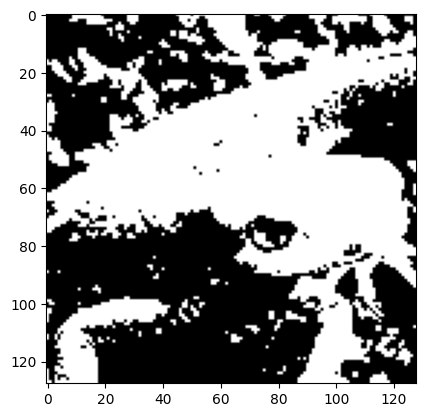

In [5]:
gray_img = gray(imori)
otsu_img = Otsu(gray_img)
# show_gray_image(otsu_img)
plt.imshow(otsu_img)
plt.gray()
plt.show()